## Problem Statement:

Identify good and bad item listings in the dataset link provided below. This will help a company avoid bad listings from being put up on their platform and pull them down if already there so that customer impact and dissatisfaction is minimal.

## Methodology

1. Check the dimensions of the data.
2. Check the Target Distribution.
3. Overall Statistics of all the variables(Continuous, Categorical, Date-Time).
4. Derive certain variables if required.
5. Missing Value Treatment(Feature set might reduce).
6. 1. Univariate Analysis(Mean, Median, Mode, Std. Dev., Quartiles, #Unique Categories).
   2. Distribution of Continuous Variables(Decile-wise, Histogram, Q-Q Plots).
7. Bivariate Analysis(Frequency Distribution, WOE_IV, Binning).
8. Check the monotonocity of WOE values for the variables. Group categories with similar      WOE values.
9. Grouping less frequent categories of every categorical variable.
10. Identifying the important features using the IV Values.

In [1]:
#Data related Package
import pandas as pd
import numpy as np

#Plotting related Package
import matplotlib.pyplot as plt

#General Purpose
import os
from collections import Counter
import timeit

#Plotting Related libraries
import matplotlib.pyplot as plt
import seaborn as sbn
import statsmodels as sm

#Modelling related packages
from sklearn.model_selection import train_test_split

In [2]:
#Importing some useful packages
import utility_functions as uf
import WOE_IV as woe

In [3]:
#Read the data
data = pd.read_csv("Final_Listings.csv")
data.shape #(3,57,997 X 70)

/home/shrikrishna/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(357997, 70)

In [4]:
#View the top 5 observations
data.head()

,Name,Summary,Space,Description,Experiences_Offered,Neighborhood_Overview,Notes,Transit,Access,Interaction,...,First_Review,Last_Review,License,Jurisdiction_Names,Cancellation_Policy,Calculated_host_listings_count,Reviews_per_Month,Geolocation,Features,Listing_Type
0,Private room in sunny three bedroom,This apartment in the West Rogers Park (or Wes...,Hi there traveler. Thanks for considering sta...,This apartment in the West Rogers Park (or Wes...,none,I love that my neighborhood is so quiet and lo...,NaN,Parking around here is very easy. You might wi...,"""You will have your private room, and you are ...",I do live in the master bedroom in this apartm...,...,2011-08-27,2016-09-18,City registration pending,"Illinois State, Cook County, IL, CHICAGO",moderate,4.0,1.34,"41.9941700301, -87.6920295649","Host Has Profile Pic,Host Identity Verified,Re...",Good
1,Lovely & cute apartment,Lovely apartment for a couple or a single pers...,Interior desig in accordance with the Scandina...,Lovely apartment for a couple or a single pers...,none,Quite and peaceful neighborhood in the Frederi...,"Please note that the bed is rather small (1,5 ...",Close to bus and the metro stations 'Frederiks...,"Fully equipped kitchen, 5 shelfs for your stuf...",I will not be living in the apartment while yo...,...,2014-10-31,2014-10-31,NaN,NaN,flexible,1.0,0.03,"55.6913945558, 12.5352884346",Host Has Profile Pic,Good
2,Unique house with a beautiful garden,Beautiful design cosy family house with a nice...,"Beautiful garden, two level house (105 m2) nea...",Beautiful design cosy family house with a nice...,none,Nice multicultural neighbourhood with plenty o...,Since our house is designed to be child friend...,Tram and bus stops in a 5 minutes walk distanc...,House and garden,"Limited, only via telephone if necessary.",...,2016-09-07,2016-10-02,NaN,Amsterdam,strict,1.0,0.29,"52.3689656398, 4.84983993143","Host Has Profile Pic,Is Location Exact",Good
3,Résidence du 14 Rue des Sablons;,"50 m2, un grand lit et un canapé lit deux plac...",NaN,"50 m2, un grand lit et un canapé lit deux plac...",none,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Paris,flexible,1.0,NaN,"48.8663711212, 2.28291441119","Host Has Profile Pic,Is Location Exact",Bad
4,Darling 2 story historical spanish,"2 blocks from beach, 1 block from 2nd st",NaN,"2 blocks from beach, 1 block from 2nd st Kitch...",none,NaN,NaN,Yes,Kitchen and bath,Mornings,...,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"33.7595912067, -118.138810843",Host Has Profile Pic,Bad


In [5]:
#Check the target distribution
def get_distribution(cat_var, data):
    '''
    Input
    cat_var:- A categorical variable
    Results
    counts_df:- A data frame containing the counts and the % of entries
    '''
    counts = dict(Counter(data[cat_var]))
    
    counts_df = pd.DataFrame({"Category": list(counts.keys()), \
                              "Values": list(counts.values())},\
                            columns=["Category", "Values"])
    total = sum(counts_df["Values"])
    
    counts_df["Percentage"] = counts_df["Values"]*100/total
    
    #Sort in descending order of counts
    counts_df = counts_df.sort_values(by="Values", ascending=False)
    total_df = pd.DataFrame({"Category": "Total", "Values":total, "Percentage":100},\
                           columns=["Category", "Values", "Percentage"], index=[counts_df.shape[0]])
    counts_df = pd.concat([counts_df, total_df])
    
    return counts_df

In [6]:
#Having a look at all the features
feature_list = data.columns.tolist()
feature_list

['Name',
 'Summary',
 'Space',
 'Description',
 'Experiences_Offered',
 'Neighborhood_Overview',
 'Notes',
 'Transit',
 'Access',
 'Interaction',
 'House_Rules',
 'Host_Name',
 'Host_Since',
 'Host_Location',
 'Host_About',
 'Host_Response_Time',
 'Host_Response_Rate',
 'Host_Acceptance_Rate',
 'Host_Neighbourhood',
 'Host_Listings_Count',
 'Host_Total_Listings_Count',
 'Street',
 'Neighbourhood',
 'Neighbourhood_Cleansed',
 'Neighbourhood_Group_Cleansed',
 'City',
 'State',
 'Zipcode',
 'Market',
 'Smart_Location',
 'Country_Code',
 'Country',
 'Latitude',
 'Longitude',
 'Property_Type',
 'Room_Type',
 'Accommodates',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Bed_Type',
 'Amenities',
 'Square_Feet',
 'Price',
 'Weekly_Price',
 'Monthly_Price',
 'Security_Deposit',
 'Cleaning_Fee',
 'Guests_Included',
 'Extra_People',
 'Minimum_Nights',
 'Maximum_Nights',
 'Calendar_Updated',
 'Has_Availability',
 'Availability_30',
 'Availability_60',
 'Availability_90',
 'Availability_365',
 'Calendar_la

## Target Variable

In [7]:
Counter(data.Listing_Type)

Counter({'Good': 301216,
         'Bad': 30933,
         'Host Has Profile Pic,Host Identity Verified,Is Location Exact': 297,
         nan: 23454,
         '48.8742374541, 2.40102069662': 1,
         'Host Is Superhost,Host Has Profile Pic,Host Identity Verified,Is Location Exact': 84,
         'Host Has Profile Pic,Host Identity Verified': 71,
         'Host Has Profile Pic,Requires License': 18,
         'Host Has Profile Pic,Host Identity Verified,Is Location Exact,Instant Bookable': 118,
         '48.8514738034, 2.3406067826': 1,
         'moderate': 17,
         'Host Has Profile Pic,Is Location Exact': 156,
         'Host Has Profile Pic,Is Location Exact,Instant Bookable': 46,
         '41.8814696861, 12.5078598094': 1,
         '1.0': 73,
         'Host Has Profile Pic,Host Identity Verified,Requires License': 20,
         'Host Has Profile Pic,Requires License,Instant Bookable': 3,
         '52.4983440656, 13.4471194888': 1,
         '2.0': 46,
         'Host Has Profile Pic,

In [8]:
#Good:- 3,01,216
#Bad:- 30,933
#Total:- 
print("Shape of the data before selecting appropriate target values:- {}" .format(data.shape))

considered_data = data.loc[(data["Listing_Type"]=="Good")|\
                           (data["Listing_Type"]=="Bad"), :]
print("Shape of the data before selecting appropriate target values:- {}" .format(considered_data.shape))


Shape of the data before selecting appropriate target values:- (357997, 70)
Shape of the data before selecting appropriate target values:- (332149, 70)


In [9]:
#Counter({'Good': 3,01,216, 'Bad': 30,933})
list(dict(Counter(considered_data["Listing_Type"])).keys())
list(dict(Counter(considered_data["Listing_Type"])).values())

[301216, 30933]

In [10]:
#Check the Target counts in considered_data
get_distribution("Listing_Type", considered_data)

,Category,Values,Percentage
0,Good,301216,90.687011
1,Bad,30933,9.312989
2,Total,332149,100.000000


## Data Statistics

In [11]:
#Obtain the statistics for each variable
data_stats = uf.get_statistics(considered_data)
data_stats = data_stats.set_index("Features")


In [12]:
#Write the statistics to a file
data_stats.to_csv(os.getcwd() + "/Statistics_Considered_Data.csv")
data_stats.head()

,Data Types,Variable Type,# Unique Categories,Missing Value Counts,Missing Value Percentage,count,mean,std,min,25%,50%,75%,max
Features,,,,,,,,,,,,,
Has_Availability,object,Categorical,2.0,325959,98.136379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Square_Feet,object,Categorical,514.0,324359,97.654667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
License,object,Categorical,5079.0,322396,97.063667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Host_Acceptance_Rate,object,Categorical,93.0,303588,91.401148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monthly_Price,object,Categorical,3803.0,280016,84.304333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Consider variables having <30% missing values
#Categorical Variables
considered_variables = data_stats.loc[data_stats["Missing Value Percentage"]<30, :].index
considered_variables = considered_variables.tolist()
len(considered_variables) #50 out of 70 variable are left

50

In [15]:
#Check the target variable
data_stats.loc[considered_variables, :].head()

,Data Types,Variable Type,# Unique Categories,Missing Value Counts,Missing Value Percentage,count,mean,std,min,25%,50%,75%,max
Features,,,,,,,,,,,,,
Host_Neighbourhood,object,Categorical,2610.0,83114,25.023107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
First_Review,object,Categorical,2647.0,82270,24.769004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reviews_per_Month,object,Categorical,1240.0,82270,24.769004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last_Review,object,Categorical,1682.0,82199,24.747628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Host_Response_Time,object,Categorical,5.0,78211,23.546962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Numeric Variables

In [16]:
#Find the numeric variables
numeric_variables = ['Square_Feet', 'Price', 'Weekly_Price', 'Monthly_Price', \
                     'Calculated_host_listings_count', 'Reviews_per_Month', \
                     'Number_of_Reviews', 'Security_Deposit', 'Cleaning_Fee',\
                     'Guests_Included', 'Extra_People', 'Minimum_Nights',\
                     'Maximum_Nights', 'Bathrooms', 'Bedrooms', 'Beds',\
                    'Latitude', 'Longitude'] 
data[numeric_variables].dtypes

Square_Feet                        object
Price                              object
Weekly_Price                       object
Monthly_Price                      object
Calculated_host_listings_count     object
Reviews_per_Month                  object
Number_of_Reviews                  object
Security_Deposit                   object
Cleaning_Fee                       object
Guests_Included                    object
Extra_People                       object
Minimum_Nights                    float64
Maximum_Nights                     object
Bathrooms                          object
Bedrooms                          float64
Beds                              float64
Latitude                           object
Longitude                          object
dtype: object

In [17]:
#Check the entries present in the numeric variables
for var in numeric_variables:
    try:
        print("#-#-#-#-" + var + "#-#-#-#-")
        print(set(data[var]))
        #data[var] = data[var].astype(float)
    except:
        print("Problem in variable:- " + var)
    

#-#-#-#-Square_Feet#-#-#-#-
{nan, 'TV,Internet,Wireless Internet,Kitchen,Breakfast,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,First aid kit,Safety card,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_50', 'TV,Wireless Internet,Air conditioning,Kitchen,Free parking on premises,Pets live on this property,Cat(s),Heating,Washer,Dryer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,Hangers,Hair dryer,Iron,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,Self Check-In,Keypad,Lockbox', 'TV,Internet,Wireless Internet,Kitchen,Heating,Washer,Smoke detector,Essentials,Shampoo', '495.0', '1400.0', '"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air conditioning"",Kitchen,Heating,""Family/kid friendly"",""Suitable for events"",Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""F

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [18]:
#Check the entries present in the numeric variables
#Write the distribution of variables to a file
continuous_writer = pd.ExcelWriter(os.getcwd() + "/Continuous_Var_Dist.xlsx")
for var in numeric_variables:
    try:
        print("#-#-#-#-" + var + "#-#-#-#-")
        distribution = get_distribution(var, considered_data)
        #Each variable's distribution will get written to their respective sheets
        distribution.to_excel(continuous_writer, sheet_name=var)
        #print(distribution.head())
        #data[var] = data[var].astype(float)
    except:
        print("Problem in variable:- " + var)

#Close the writer for the changes to take effect
continuous_writer.close()

#-#-#-#-Square_Feet#-#-#-#-
#-#-#-#-Price#-#-#-#-
#-#-#-#-Weekly_Price#-#-#-#-
#-#-#-#-Monthly_Price#-#-#-#-
#-#-#-#-Calculated_host_listings_count#-#-#-#-
#-#-#-#-Reviews_per_Month#-#-#-#-
#-#-#-#-Number_of_Reviews#-#-#-#-
#-#-#-#-Security_Deposit#-#-#-#-
#-#-#-#-Cleaning_Fee#-#-#-#-
#-#-#-#-Guests_Included#-#-#-#-
#-#-#-#-Extra_People#-#-#-#-
#-#-#-#-Minimum_Nights#-#-#-#-
#-#-#-#-Maximum_Nights#-#-#-#-
#-#-#-#-Bathrooms#-#-#-#-
#-#-#-#-Bedrooms#-#-#-#-
#-#-#-#-Beds#-#-#-#-
#-#-#-#-Latitude#-#-#-#-
#-#-#-#-Longitude#-#-#-#-


### Cleaning the entries present in the numeric variables

In [ ]:
#Kernel got hanged upon execution
#set(considered_data["Square_Feet"])

In [19]:
#Replace Date related values, String values of the numeric variables with NA
def replace_unwanted(data, var):
    
    cleaned_var = []
    for value in data[var]:
        try:
            cleaned_var.append(float(value)) #float('136.0') #136.0
        except: #Place NA
            cleaned_var.append(np.nan) #Replace the string value with NA
    return cleaned_var    

In [20]:
#Missing value count before replacement with NA
uf.missing_value_analysis(considered_data[numeric_variables])

,Features,Missing Value Counts,Missing Value Percentage
0,Square_Feet,324359,97.654667
3,Monthly_Price,280016,84.304333
2,Weekly_Price,278703,83.909029
7,Security_Deposit,219699,66.144712
8,Cleaning_Fee,160486,48.317472
5,Reviews_per_Month,82270,24.769004
1,Price,63171,19.018874
10,Extra_People,58507,17.614685
16,Latitude,58484,17.607760
17,Longitude,58484,17.607760


In [21]:
for var in numeric_variables:
    considered_data[var] = replace_unwanted(considered_data, var)

/home/shrikrishna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
#Missing value count after replacement with NA
uf.missing_value_analysis(considered_data[numeric_variables])

,Features,Missing Value Counts,Missing Value Percentage
0,Square_Feet,324359,97.654667
3,Monthly_Price,280016,84.304333
2,Weekly_Price,278703,83.909029
7,Security_Deposit,219699,66.144712
8,Cleaning_Fee,160486,48.317472
5,Reviews_per_Month,82270,24.769004
1,Price,63171,19.018874
10,Extra_People,58507,17.614685
16,Latitude,58484,17.607760
17,Longitude,58484,17.607760


In [23]:
considered_data[["Reviews_per_Month"]].isnull().sum()

Reviews_per_Month    82270
dtype: int64

In [24]:
#Missing value count after replacement with NA
uf.missing_value_analysis(data[numeric_variables])

,Features,Missing Value Counts,Missing Value Percentage
0,Square_Feet,342184,95.582924
3,Monthly_Price,300190,83.852658
2,Weekly_Price,298401,83.352933
7,Security_Deposit,244271,68.232695
8,Cleaning_Fee,183570,51.276966
5,Reviews_per_Month,105422,29.447733
1,Price,82498,23.044327
17,Longitude,77634,21.685657
10,Extra_People,76993,21.506605
16,Latitude,76353,21.327832


In [25]:
#How many numeric variables are present in the list of considered_variables
print("Before removing:- %d" %(len(numeric_variables)))
numeric_variables = list(set(numeric_variables).intersection(set(considered_variables)))
print("After removing:- %d" %(len(numeric_variables)))

Before removing:- 18
After removing:- 13


In [ ]:
'''
for var in numeric_variables:
    try:
        print("#-#-#-#-" + var + "#-#-#-#-")
        print(set(data[var]))
        #data[var] = data[var].astype(float)
    except:
        print("Problem in variable:- " + var)
''' 

## Obtain the Statistics Post Replacing Values

In [23]:
#Obtain the statistics for each variable
data_stats = uf.get_statistics(considered_data)
data_stats = data_stats.set_index("Features")

#Write the statistics to a file
data_stats.to_csv(os.getcwd() + "/Statistics_Considered_Data.csv")
data_stats.head()


50

In [24]:
data_stats.loc[data_stats["Data Types"]=="float64", :].head()

,Data Types,Variable Type,# Unique Categories,Missing Value Counts,Missing Value Percentage,count,mean,std,min,25%,50%,75%,max
Features,,,,,,,,,,,,,
Square_Feet,float64,Numeric,NaN,324359,97.654667,7790.0,576.056226,1609.428274,0.0,0.0,377.0,800.0,115863.0
Monthly_Price,float64,Numeric,NaN,280016,84.304333,52133.0,3023.291562,4922.363359,0.0,1100.0,1800.0,3000.0,180000.0
Weekly_Price,float64,Numeric,NaN,278703,83.909029,53446.0,483.475283,214.795895,0.0,300.0,450.0,640.0,999.0
Security_Deposit,float64,Numeric,NaN,219699,66.144712,112450.0,268.845860,170.510663,0.0,150.0,200.0,350.0,999.0
Cleaning_Fee,float64,Numeric,NaN,160486,48.317472,171663.0,61.149170,78.318347,0.0,20.0,40.0,70.0,999.0


In [25]:
data_stats.loc[data_stats["Data Types"]!="float64", :].head()

,Data Types,Variable Type,# Unique Categories,Missing Value Counts,Missing Value Percentage,count,mean,std,min,25%,50%,75%,max
Features,,,,,,,,,,,,,
Has_Availability,object,Categorical,2.0,325959,98.136379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
License,object,Categorical,5079.0,322396,97.063667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Host_Acceptance_Rate,object,Categorical,93.0,303588,91.401148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Neighbourhood_Group_Cleansed,object,Categorical,68.0,262222,78.947099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jurisdiction_Names,object,Categorical,28.0,240563,72.426230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
considered_data[numeric_variables].describe().T

,count,mean,std,min,25%,50%,75%,max
Square_Feet,7790.0,576.056226,1.609428e+03,0.000000,0.000000,377.000000,800.000000,1.158630e+05
Price,268978.0,136.758040,1.535649e+02,0.000000,52.000000,86.000000,150.000000,9.990000e+02
Weekly_Price,53446.0,483.475283,2.147959e+02,0.000000,300.000000,450.000000,640.000000,9.990000e+02
Monthly_Price,52133.0,3023.291562,4.922363e+03,0.000000,1100.000000,1800.000000,3000.000000,1.800000e+05
Calculated_host_listings_count,331541.0,6.940553,4.266547e+01,1.000000,1.000000,1.000000,2.000000,7.520000e+02
Reviews_per_Month,249879.0,1.471928,1.743618e+00,0.010000,0.320000,0.870000,2.010000,2.230000e+02
Number_of_Reviews,332148.0,16.366584,3.169438e+01,0.000000,1.000000,4.000000,17.000000,5.740000e+02
Security_Deposit,112450.0,268.845860,1.705107e+02,0.000000,150.000000,200.000000,350.000000,9.990000e+02
Cleaning_Fee,171663.0,61.149170,7.831835e+01,0.000000,20.000000,40.000000,70.000000,9.990000e+02
Guests_Included,332148.0,1.542409,1.222177e+00,0.000000,1.000000,1.000000,2.000000,2.000000e+01


## Categorical Variables

In [11]:
data_stats.head()

,Features,Data Types,Variable Type,# Unique Categories,Missing Value Counts,Missing Value Percentage,count,mean,std,min,25%,50%,75%,max
0,Has_Availability,object,Categorical,2.0,325959,98.136379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Square_Feet,float64,Numeric,NaN,324359,97.654667,7790.0,576.056226,1609.428274,0.0,0.0,377.0,800.0,115863.0
2,License,object,Categorical,5079.0,322396,97.063667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Host_Acceptance_Rate,object,Categorical,93.0,303588,91.401148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Monthly_Price,float64,Numeric,NaN,280016,84.304333,52133.0,3023.291562,4922.363359,0.0,1100.0,1800.0,3000.0,180000.0


In [14]:
#Read the data_stats
data_stats = pd.read_csv(os.getcwd() + "/Statistics_Considered_Data.csv")

#Obtain the list of categorical variables
categorical_variables = data_stats.loc[data_stats["Variable Type"]=="Categorical", "Features"].tolist()
print("Count of all categorical variables:- %d" %(len(categorical_variables)))

#Consider variables having <30% missing values
considered_variables = data_stats.loc[data_stats["Missing Value Percentage"]<30, "Features"].tolist()

print(len(considered_variables)) #50 out of 70 variable are left

#Consider those categorical variables having <30% missing values
categorical_variables = list(set(categorical_variables).intersection(set(considered_variables)))

print("Count of considered categorical variables:- %d" %(len(categorical_variables)))

Count of all categorical variables:- 49
50
Count of considered categorical variables:- 34


In [28]:
#Considering 33 out of 70 variables
print(len(categorical_variables + numeric_variables)) #33

52


In [19]:
Counter(data_stats["Data Types"]), Counter(data_stats["Variable Type"])

(Counter({'object': 49, 'float64': 21}),
 Counter({'Categorical': 49, 'Numeric': 21}))

In [30]:
vars_ = set(considered_variables).difference(set(categorical_variables + numeric_variables))
uf.missing_value_analysis(considered_data[vars_])

,Features,Missing Value Counts,Missing Value Percentage
0,Availability_90,1,0.000301
1,Availability_60,1,0.000301
2,Availability_365,1,0.000301


In [31]:
#Check whether Latitude and Longitude are missing for the same observations
missing_longitude_index = set(considered_data.loc[considered_data["Latitude"].isnull()==True, \
                                                  "Longitude"].index.tolist())
missing_latitude_index = set(considered_data.loc[considered_data["Longitude"].isnull()==True, \
                        "Latitude"].index.tolist())

#Empty sets imply that Latitude and Longitude are missing for the same set of indices
print(set(missing_longitude_index).difference(set(missing_latitude_index)))
print(set(missing_latitude_index).difference(set(missing_longitude_index)))

set()
set()


## Continuous Variables - Histogram


In [32]:
def plot_histogram(variable, data, train_test="base_data"):
    plt.hist(data[variable])
    plt.xlabel("Values")
    plt.ylabel("Counts")
    plt.title(variable)
    plt.savefig(os.getcwd() + "/Plots/Histograms/" + variable + "_" + train_test + ".png")
    plt.show()

/home/shrikrishna/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shrikrishna/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


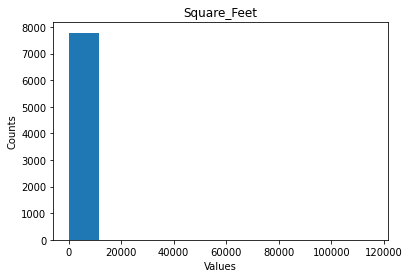

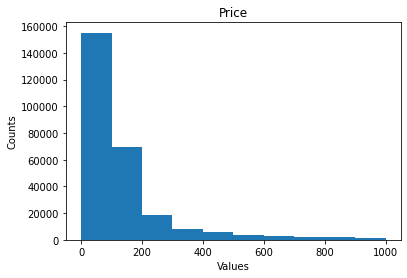

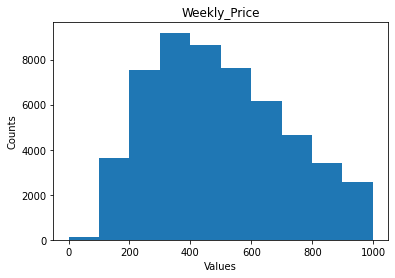

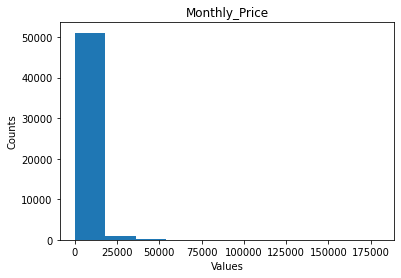

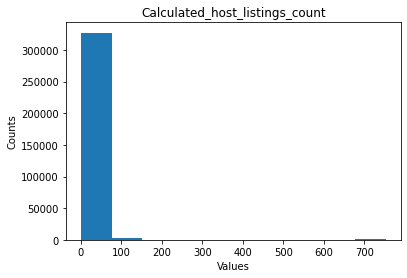

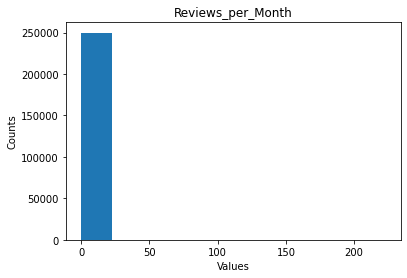

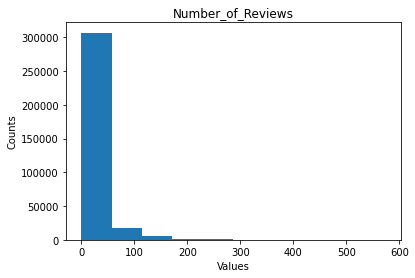

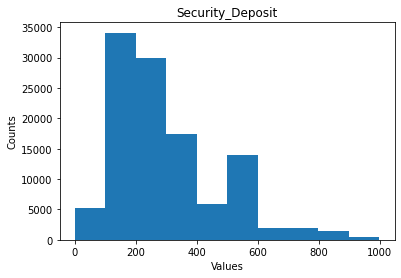

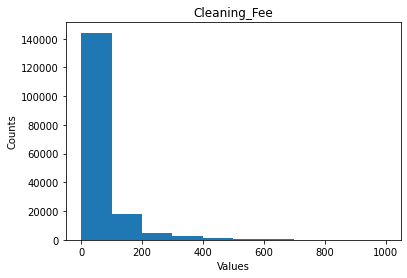

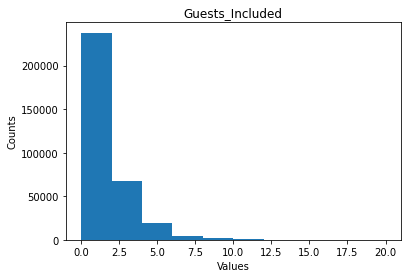

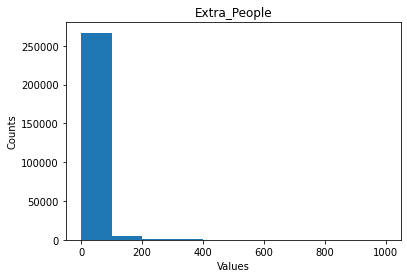

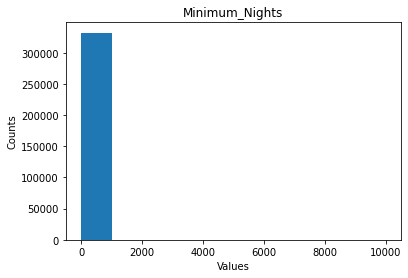

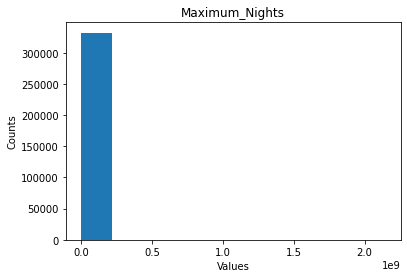

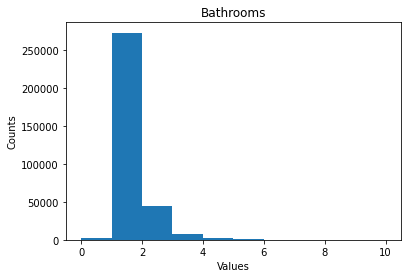

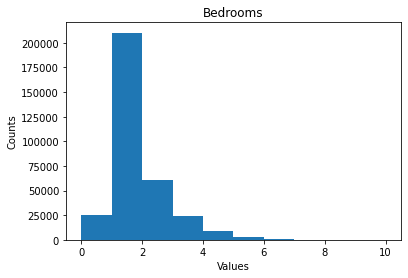

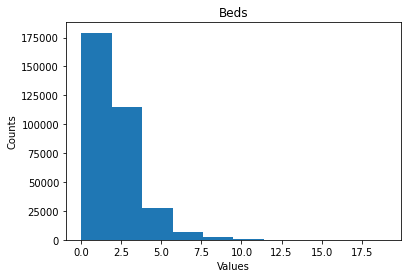

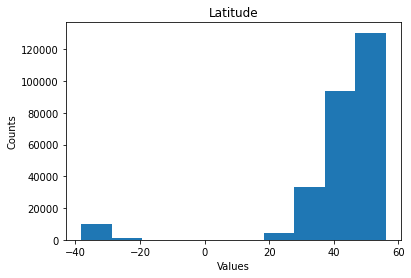

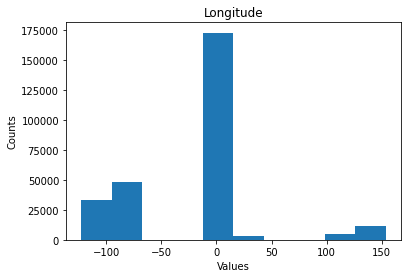

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [33]:
#Histograms of all the continuous variables 
[plot_histogram(cont_var, considered_data) for cont_var in numeric_variables]

## Continuous Variables - Outlier Analysis

In [34]:
def plotting(variable, data=considered_data):
    #f, ax = plt.subplots(figsize=(6,6))
    plt.boxplot(data[variable])
    plt.title(variable)
    plt.show()
    plt.savefig(os.getcwd() + "/Plots/Outlier Analysis/" + variable + ".png")

In [54]:
#considered_data[numeric_variables].describe().T

,count,mean,std,min,25%,50%,75%,max
Bedrooms,331719.0,1.376958,9.333696e-01,0.000000,1.000000,1.000000,2.000000,1.000000e+01
Calculated_host_listings_count,331541.0,6.940553,4.266547e+01,1.000000,1.000000,1.000000,2.000000,7.520000e+02
Guests_Included,332148.0,1.542409,1.222177e+00,0.000000,1.000000,1.000000,2.000000,2.000000e+01
Extra_People,273642.0,12.273781,3.327120e+01,0.000000,0.000000,0.000000,15.000000,9.990000e+02
Number_of_Reviews,332148.0,16.366584,3.169438e+01,0.000000,1.000000,4.000000,17.000000,5.740000e+02
Beds,331498.0,1.919677,1.470359e+00,0.000000,1.000000,1.000000,2.000000,1.900000e+01
Reviews_per_Month,249879.0,1.471928,1.743618e+00,0.010000,0.320000,0.870000,2.010000,2.230000e+02
Price,268978.0,136.758040,1.535649e+02,0.000000,52.000000,86.000000,150.000000,9.990000e+02
Minimum_Nights,332148.0,3.363513,2.527950e+01,1.000000,1.000000,2.000000,3.000000,1.000000e+04
Maximum_Nights,332148.0,221489.162867,2.070932e+07,1.000000,34.000000,1125.000000,1125.000000,2.147484e+09


In [55]:
#Boxplot of all the continuous variables 
#[plotting(cont_var, considered_data) for cont_var in numeric_variables]

In [56]:
def plot_qq_plot(var, data):
    pass

In [35]:
considered_data[['Availability_30',
 'Availability_60',
 'Availability_90',
 'Availability_365']].describe().T

,count,mean,std,min,25%,50%,75%,max
Availability_60,332148.0,22.750888,22.344677,0.0,0.0,16.0,43.0,60.0
Availability_90,332148.0,37.463637,33.877637,0.0,0.0,32.0,70.0,90.0
Availability_365,332148.0,163.618107,140.497559,0.0,12.0,141.0,311.0,365.0


## Train & Test Split

In [36]:
Counter(considered_data["Listing_Type"])

Counter({'Good': 301216, 'Bad': 30933})

In [37]:
uf.missing_value_analysis(considered_data[considered_variables])

,Features,Missing Value Counts,Missing Value Percentage
0,Host_Neighbourhood,83114,25.023107
1,First_Review,82270,24.769004
2,Reviews_per_Month,82270,24.769004
3,Last_Review,82199,24.747628
4,Host_Response_Time,78211,23.546962
5,Price,63171,19.018874
6,Features,58654,17.658942
7,Extra_People,58507,17.614685
8,Longitude,58484,17.607760
9,Latitude,58484,17.607760


In [77]:
target = "Listing_Type"
independent_vars = list(set(considered_variables).difference(set([target])))

X = considered_data[independent_vars]
y = considered_data["Listing_Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
list(map(lambda data: data.shape, [X_train, X_test, y_train, y_test]))

[(265719, 49), (66430, 49), (265719,), (66430,)]

In [79]:
#Write the base data, training data and testing data to a file

#Convert the series to data frames
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

#Concat the 2 data frames
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

data_sets_writer = pd.ExcelWriter(os.getcwd() + "/Data Sets/All_Data_Sets.xlsx")

#considered_data[considered_variables].to_excel(data_sets_writer, sheet_name="Base Data")
train_data.to_excel(data_sets_writer, sheet_name="Training Data")
#test_data.to_excel(data_sets_writer, sheet_name="Testing Data")

#Close the writer for the changes to take effect
data_sets_writer.close()

In [80]:
test_data.head()

,Country,Cancellation_Policy,State,Availability_60,Host_Name,Availability_365,Accommodates,Neighbourhood_Cleansed,Host_Since,Smart_Location,...,Latitude,Maximum_Nights,Room_Type,Host_Listings_Count,Bedrooms,Street,Availability_30,Market,First_Review,Listing_Type
134068,United Kingdom,strict,NaN,40.0,Margarita,331.0,3.0,Hammersmith and Fulham,2014-11-29,"London, United Kingdom",...,51.471496,21.0,Entire home/apt,3.0,1.0,"Wandsworth Bridge Road, London, SW6 2TF, Unite...",10.0,London,2016-04-25,Good
145561,Italy,moderate_new,Lazio,56.0,Claudio,82.0,3.0,VII San Giovanni/Cinecittà,2015-11-29,"Roma, Italy",...,41.870724,10.0,Private room,4.0,1.0,"Roma, Lazio 00179, Italy",28.0,Rome,2017-04-07,Good
138902,United States,moderate,CA,0.0,Valerie,120.0,12.0,Castaic,2017-01-13,"Castaic, CA",...,34.464424,30.0,Entire home/apt,1.0,4.0,"Castaic, CA 91384, United States",0.0,Other (Domestic),2017-04-09,Good
303145,France,moderate,Île-de-France,6.0,Alain,43.0,2.0,Entrepôt,2013-07-22,"Paris, France",...,48.873116,1125.0,Entire home/apt,1.0,0.0,"X Arrondissement, Paris, Île-de-France 75010, ...",6.0,Paris,2017-01-01,Good
185635,France,strict,Île-de-France,35.0,June,340.0,4.0,Louvre,2012-06-11,"Paris, France",...,48.861860,130.0,Entire home/apt,2.0,1.0,"Châtelet - Les Halles - Beaubourg, Paris, Île-...",5.0,Paris,2012-07-06,Good


In [81]:
#Write the considered_data
considered_data[considered_variables].to_csv(os.getcwd() + "/Data Sets/considered_data.csv")

#Write the test data
test_data.to_csv(os.getcwd() + "/Data Sets/Testing Data.csv")

## Univariate Analysis - Train Data

In [58]:
import datetime as dt
train_data["Last_Review"].dtype

False

In [59]:
train_data["Last_Review"].dtype == np.dtype('datetime64[ns]')

True

In [77]:
data_stats_train = uf.get_statistics(train_data)

ValueError: Length of values does not match length of index

## Univariate Analysis - Test Datast 

In [ ]:
data_stats_test = uf.get_statistics(test_data[considered_variables])

## Variable Importance & Binning

In [3]:
train_data = pd.read_excel(os.getcwd() + "/Data Sets/All_Data_Sets.xlsx") 
test_data = pd.read_csv(os.getcwd() + "/Data Sets/Testing Data.csv")

In [4]:
train_data.shape, test_data.shape

((265719, 51), (66430, 51))

In [82]:
#Check the target distribution in training data
print("Target Distribution - Train Data:- \n{}" \
      .format(get_distribution("Listing_Type", train_data)))

#Check the target distribution in testing data
print("Target Distribution - Test Data:- \n{}" \
      .format(get_distribution("Listing_Type", test_data)))

Target Distribution - Train Data:- 
  Category  Values  Percentage
0     Good  240950   90.678499
1      Bad   24769    9.321501
2    Total  265719  100.000000
Target Distribution - Test Data:- 
  Category  Values  Percentage
0     Good   60266    90.72106
1      Bad    6164     9.27894
2    Total   66430   100.00000


In [87]:
#Write the distribution for categorical variables - Train Data
cat_writer_train = pd.ExcelWriter(os.getcwd() + "/Distribution/WOE_IV_categorical_train.xlsx")
if(target in categorical_variables):
    categorical_variables.remove(target)
for cat_var in categorical_variables:
    woe_iv_df = woe.woe_iv(cat_var, train_data)
    woe_iv_df.to_excel(cat_writer_train, sheet_name = "train_" + cat_var)
    
#Close the writer for the data frames to be written to the respective sheets    
cat_writer_train.close() 


In [49]:
#Write the distribution for categorical variables - Test Data
cat_writer_test = pd.ExcelWriter(os.getcwd() + "/Distribution/WOE_IV_categorical_test.xlsx")
for cat_var in categorical_variables:
    woe_iv_df = woe.woe_iv(cat_var, test_data)
    woe_iv_df.to_excel(cat_writer_test, sheet_name = "test_" + cat_var)
    
#Close the writer for the data frames to be written to the respective sheets
cat_writer_test.close()

### Combine the less Frequent Categories

Columns of the woe_iv_df data frame

Categories

Event Count

Non Event Count

Total Counts

Event %

Non Event %

Event Rate

WOE


In [99]:
def tag_others(cumm_per, category):
    if(cumm_per>=95):
        return "OTHERS"
    return category

In [111]:
#Store the categories to be placed in OTHERS category
others_dict = dict()

cat_writer_train = pd.ExcelWriter(os.getcwd() + "/Distribution/WOE_IV_categorical_train.xlsx")

#For storing cummulative counts
cat_writer_train_cumm = pd.ExcelWriter(os.getcwd() + "/Distribution/WOE_IV_categorical_train_cumm.xlsx")

for cat_var in categorical_variables:
    woe_iv_df_cat_var = pd.read_excel(cat_writer_train, sheet_name = "train_" + cat_var)
    total_count = sum(woe_iv_df_cat_var["Total Counts"])
    woe_iv_df_cat_var["Count %"] = woe_iv_df_cat_var["Total Counts"]*100/total_count
    woe_iv_df_cat_var = woe_iv_df_cat_var["Count %"].reset_index()
    
    if('index' in woe_iv_df_cat_var.columns):
        woe_iv_df_cat_var = woe_iv_df_cat_var.drop('index', axis=1)
    
    cumm_per = [woe_iv_df_cat_var.loc[0, "Count %"]] #A list of cummulative %age
    
    for ind in range(1, woe_iv_df_cat_var.shape[0]):
        new_per = cumm_per[ind-1] + woe_iv_df_cat_var.loc[ind, "Count %"]
        cumm_per.append(new_per)
    
    #Create a new column named "Cummulative %"
    woe_iv_df_cat_var["Cummulative %"] = cumm_per
    
    #Club the categories having Cummulative % >=95% into "OTHERS" group
    try:
        if(len(woe_iv_df_cat_var["Categories"]) > 5):
            woe_iv_df_cat_var["Binned Categories"] = list(map(lambda x, y: tag_others(x, y),\
                                                         woe_iv_df_cat_var["Cummulative %"],\
                                                         woe_iv_df_cat_var["Categories"]))
            others_dict[cat_var] =  woe_iv_df_cat_var.loc[woe_iv_df_cat_var["Binned Categories"]="OTHERS", \
                                                         "Categories"].tolist()
    except:
        pass
    
    #Write the updated table to a new file, writer = cat_writer_train_cumm
    woe_iv_df_cat_var.to_excel(cat_writer_train_cumm, sheet_name = "train_" + cat_var)
    
cat_writer_train.close() 

#Close the writer for the data frames to be written to the respective sheets    
cat_writer_train_cumm.close()

### Convert certain variables to Date time

In [79]:
#Convert certain variables to Date time
date_related_vars = ["Last_Review", "First_Review", "Host_Since", "Calendar_last_Scraped"]

#Remove these variables from the list of categorical variables
categorical_variables = list(set(categorical_variables).difference(set(date_related_vars)))

test_data[date_related_vars].dtypes

Last_Review              datetime64[ns]
First_Review                     object
Host_Since               datetime64[ns]
Calendar_last_Scraped    datetime64[ns]
dtype: object

In [25]:
train_data[date_related_vars].dtypes

Last_Review    object
Last_Review    object
Host_Since     object
dtype: object

In [80]:
for date_var in date_related_vars:
    test_data[date_var] = list(map(lambda date:date if(type(date)==float) else pd.to_datetime(date), \
                                   test_data[date_var]))
    train_data[date_var] = list(map(lambda date:date if(type(date)==float) else pd.to_datetime(date), \
                                    train_data[date_var]))
    
#Write the updated data to it's respective location
train_data.to_excel(os.getcwd() + "/Data Sets/All_Data_Sets.xlsx")
test_data.to_csv(os.getcwd() + "/Data Sets/Testing Data.csv")

In [81]:
test_data[date_related_vars].dtypes

Last_Review              datetime64[ns]
First_Review             datetime64[ns]
Host_Since               datetime64[ns]
Calendar_last_Scraped    datetime64[ns]
dtype: object

In [71]:
data_stats.loc[(data_stats["Variable Type"]=="Categorical") &\
              (data_stats["Missing Value Percentage"]<30), :].head(10)

,Features,Data Types,Variable Type,# Unique Categories,Missing Value Counts,Missing Value Percentage,count,mean,std,min,25%,50%,75%,max
20,Host_Neighbourhood,object,Categorical,2610.0,83114,25.023107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,First_Review,object,Categorical,2647.0,82270,24.769004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,Last_Review,object,Categorical,1682.0,82199,24.747628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,Host_Response_Time,object,Categorical,5.0,78211,23.546962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,Features,object,Categorical,139.0,58654,17.658942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,Geolocation,object,Categorical,273664.0,58484,17.607760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,State,object,Categorical,1420.0,34219,10.302304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,Zipcode,object,Categorical,40291.0,13406,4.036140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,Summary,object,Categorical,310478.0,10693,3.219338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,Market,object,Categorical,160.0,3918,1.179591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Derived Variables

In [74]:
train_data[date_related_vars].dtypes

Last_Review              datetime64[ns]
Last_Review              datetime64[ns]
Host_Since               datetime64[ns]
Calendar_last_Scraped    datetime64[ns]
dtype: object

In [87]:
#Review_Proximity = Last_Review - First_Review
class DerivedVariables():
    def __init__(self, data):
        self.data = data
        self.derived_vars = []
    def get_review_proximity(self):
        self.data["Review_Proximity"] = self.data["Last_Review"] - self.data["First_Review"]
        #Extraxt the days
        self.data["Review_Proximity"] = list(map(lambda day: day.days, \
                                                 self.data["Review_Proximity"]))
        self.data["Review_Proximity_Year"] = self.data["Review_Proximity"]
        self.derived_vars.append("Review_Proximity")
        
    def driver(self):
        self.get_review_proximity()
        return self.derived_vars    

In [88]:
derived_vars_obj_train = DerivedVariables(train_data)
derived_vars_train = derived_vars_obj_train.driver()

derived_vars_obj_test = DerivedVariables(test_data)
derived_vars_test = derived_vars_obj_test.driver()

print("Train:- \n")
print(train_data["Review_Proximity"].head())
print("Test:- \n")
print(test_data["Review_Proximity"].head())

Train:- 

0       NaN
1     885.0
2      69.0
3    1324.0
4    2181.0
Name: Review_Proximity, dtype: float64
Test:- 

0     279.0
1       0.0
2       0.0
3      45.0
4    1732.0
Name: Review_Proximity, dtype: float64


In [89]:
print("Derived Vars(Training Set):- " + str(derived_vars_train))
print("Derived Vars(Testing Set):- " + str(derived_vars_test))

Derived Vars(Training Set):- ['Review_Proximity']
Derived Vars(Testing Set):- ['Review_Proximity']


In [95]:
#Creating some derived variables from the numeric variables
numeric_variables = ['Square_Feet', 'Price', 'Weekly_Price', 'Monthly_Price', \
                     'Calculated_host_listings_count', 'Reviews_per_Month', \
                     'Number_of_Reviews', 'Security_Deposit', 'Cleaning_Fee',\
                     'Guests_Included', 'Extra_People', 'Minimum_Nights',\
                     'Maximum_Nights', 'Bathrooms', 'Bedrooms', 'Beds',\
                    'Latitude', 'Longitude']

#considered_variables have missing value % < 30%
numeric_variables = list(set(numeric_variables).intersection(set(considered_variables)))
numeric_variables

['Maximum_Nights',
 'Reviews_per_Month',
 'Number_of_Reviews',
 'Extra_People',
 'Latitude',
 'Guests_Included',
 'Price',
 'Beds',
 'Longitude',
 'Bedrooms',
 'Minimum_Nights',
 'Bathrooms',
 'Calculated_host_listings_count']

In [96]:
train_data[numeric_variables].head()

,Maximum_Nights,Reviews_per_Month,Number_of_Reviews,Extra_People,Latitude,Guests_Included,Price,Beds,Longitude,Bedrooms,Minimum_Nights,Bathrooms,Calculated_host_listings_count
0,60.0,NaN,0.0,25.0,39.518722,7.0,250.0,7.0,2.746206,4.0,4.0,2.0,2.0
1,1125.0,0.76,23.0,20.0,51.536599,2.0,35.0,1.0,-0.193564,1.0,2.0,1.0,3.0
2,1125.0,0.24,2.0,20.0,41.830761,4.0,165.0,2.0,-87.618852,2.0,2.0,2.0,4.0
3,30.0,0.83,37.0,NaN,NaN,4.0,NaN,3.0,NaN,3.0,3.0,3.0,3.0
4,30.0,1.54,112.0,50.0,30.244401,2.0,165.0,1.0,-97.751205,0.0,2.0,1.0,2.0


In [97]:
train_data[date_related_vars].head()

,Last_Review,First_Review,Host_Since,Calendar_last_Scraped
0,NaT,NaT,2016-05-25,2017-03-15
1,2017-02-17,2014-09-16,2014-05-05,2017-03-05
2,2016-11-06,2016-08-29,2016-04-07,2017-05-10
3,2017-04-22,2013-09-06,2013-03-18,2017-05-09
4,2017-03-05,2011-03-16,2010-10-23,2017-03-07


In [48]:
if("Listing_Type" in categorical_variables):
    categorical_variables.remove("Listing_Type")

### Country_Code and Country are Same

In [66]:
code_contry_cross = pd.crosstab(train_data["Country_Code"], train_data["Country"])
code_contry_cross

Country,Australia,Austria,Belgium,Canada,China,Cuba,Denmark,France,Germany,Greece,Hong Kong,Ireland,Italy,Mexico,Netherlands,Spain,Switzerland,United Kingdom,United States,Uruguay
Country_Code,,,,,,,,,,,,,,,,,,,,
AT,0,4249,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AU,22516,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BE,0,0,4079,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CA,0,0,0,16837,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1285,0,0,0
CN,0,0,0,0,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CU,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DE,0,0,0,0,0,0,0,0,11281,0,0,0,0,0,0,0,0,0,0,0
DK,0,0,0,0,0,0,11415,0,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
for ind in code_contry_cross.index:
    if(len(set(code_contry_cross.loc[ind, :]))!=2):
        print(ind + " is different")

#Implies that they are same

In [86]:
categorical_variables

['Property_Type',
 'Market',
 'Features',
 'State',
 'Amenities',
 'Host_Total_Listings_Count',
 'Smart_Location',
 'Host_Name',
 'Country',
 'Accommodates',
 'Cancellation_Policy',
 'Name',
 'Bed_Type',
 'Country_Code',
 'Description',
 'Room_Type',
 'Neighbourhood_Cleansed',
 'Host_Neighbourhood',
 'Host_Response_Time',
 'Summary',
 'Availability_30',
 'Street',
 'Calendar_Updated',
 'Geolocation',
 'Zipcode',
 'Host_Listings_Count',
 'Host_Location',
 'City',
 'Experiences_Offered']

In [63]:
Counter(test_data["Host_Response_Time"])

Counter({'within an hour': 26408,
         'within a few hours': 13114,
         'within a day': 9674,
         nan: 15591,
         'a few days or more': 1643})